# EDA

In [40]:
%reload_ext autoreload
%autoreload 2

# check if working in colab
try:
    # In colab
    from google.colab import drive
    drive.mount('/content/drive')

    %cd /content/drive/MyDrive/projects/paris-traffic-forecast
    %pip install -q darts

except:
    # In local
    # replace with your path
    %cd /mnt/d/Google Drive/projects/paris-traffic-forecast




[Errno 2] No such file or directory: '/mnt/d/Google Drive/projects/paris-traffic-forecast'
/Users/anouaroussalah/Desktop/paris-traffic-forecast/notebooks


In [28]:
# Import libraries
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as scs
import statsmodels.tsa.api as smt

## load data

In [2]:
import pandas as pd
#path_to_data = 'data/AV-champs-elysees.csv'
path_to_data = '/Users/anouaroussalah/Desktop/paris-traffic-forecast/data/AV-champs-elysees.csv'
time_col = "Date et heure de comptage"
value_cols = ['Débit horaire', "Taux d'occupation"]
df = pd.read_csv(path_to_data, sep=';').sort_values(time_col)
# set datetime index
df['Date et heure de comptage'] = pd.to_datetime(df['Date et heure de comptage'], utc=True).dt.tz_localize(None)
df[time_col] = pd.DatetimeIndex(df[time_col])
df = df.set_index(time_col)
df

,Identifiant arc,Libelle,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape
Date et heure de comptage,,,,,,,,,,,,,,
2020-11-01 03:00:00,4264,AV_Champs_Elysees,34.0,0.40111,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2020-11-01 04:00:00,4264,AV_Champs_Elysees,40.0,0.48389,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2020-11-01 05:00:00,4264,AV_Champs_Elysees,66.0,0.75056,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2020-11-01 06:00:00,4264,AV_Champs_Elysees,108.0,0.99611,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2020-11-01 07:00:00,4264,AV_Champs_Elysees,126.0,1.09889,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30 19:00:00,4264,AV_Champs_Elysees,1311.0,27.14111,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2021-11-30 20:00:00,4264,AV_Champs_Elysees,1195.0,23.34445,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."
2021-11-30 21:00:00,4264,AV_Champs_Elysees,1154.0,17.12945,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.8715358799,2.30172279246","{""type"": ""LineString"", ""coordinates"": [[2.3009..."


In [78]:
df.iloc[0]

Identifiant arc                                                         4264
Libelle                                                    AV_Champs_Elysees
Débit horaire                                                           34.0
Taux d'occupation                                                    0.40111
Etat trafic                                                           Fluide
Identifiant noeud amont                                                 2294
Libelle noeud amont                             Av_Champs_Elysees-Washington
Identifiant noeud aval                                                  2293
Libelle noeud aval                                   Av_Champs_Elysees-Berri
Etat arc                                                            Invalide
Date debut dispo data                                             2005-01-01
Date fin dispo data                                               2019-06-01
geo_point_2d                                     48.8715358799,2.30172279246

In [80]:
df.iloc[-1]

Identifiant arc                                                         4264
Libelle                                                    AV_Champs_Elysees
Débit horaire                                                          965.0
Taux d'occupation                                                   13.15167
Etat trafic                                                           Fluide
Identifiant noeud amont                                                 2294
Libelle noeud amont                             Av_Champs_Elysees-Washington
Identifiant noeud aval                                                  2293
Libelle noeud aval                                   Av_Champs_Elysees-Berri
Etat arc                                                            Invalide
Date debut dispo data                                             2005-01-01
Date fin dispo data                                               2019-06-01
geo_point_2d                                     48.8715358799,2.30172279246

In [74]:
df.describe()

,Identifiant arc,Débit horaire,Taux d'occupation,Identifiant noeud amont,Identifiant noeud aval
count,9233.0,9185.000000,9179.000000,9233.0,9233.0
mean,4264.0,728.262058,14.024305,2294.0,2293.0
std,0.0,427.744884,12.733968,0.0,0.0
min,4264.0,1.000000,0.000000,2294.0,2293.0
25%,4264.0,289.000000,3.308610,2294.0,2293.0
50%,4264.0,833.000000,11.419450,2294.0,2293.0
75%,4264.0,1113.000000,20.741390,2294.0,2293.0
max,4264.0,1703.000000,96.136110,2294.0,2293.0


In [49]:
from darts import TimeSeries

# transform data to TimeSeries
ts = TimeSeries.from_dataframe(df, 
                          value_cols=["Débit horaire", "Taux d'occupation"],
                          fill_missing_dates=True,
                          freq='H')
ts

<TimeSeries (DataArray) (Date et heure de comptage: 9477, component: 2, sample: 1)>
array([[[3.400000e+01],
        [4.011100e-01]],

       [[4.000000e+01],
        [4.838900e-01]],

       [[6.600000e+01],
        [7.505600e-01]],

       ...,

       [[1.154000e+03],
        [1.712945e+01]],

       [[1.049000e+03],
        [1.632389e+01]],

       [[9.650000e+02],
        [1.315167e+01]]])
Coordinates:
  * Date et heure de comptage  (Date et heure de comptage) datetime64[ns] 202...
  * component                  (component) object 'Débit horaire' "Taux d'occ...
Dimensions without coordinates: sample

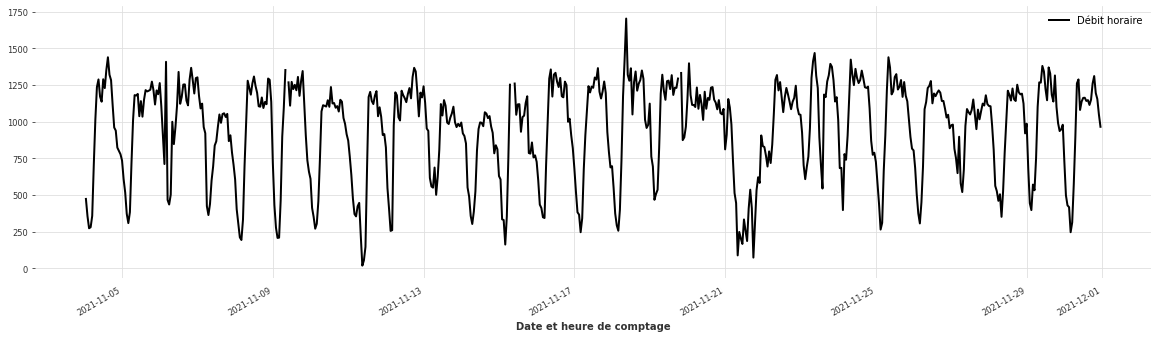

In [72]:
plt.rcParams['figure.figsize'] = [20, 5]
# plot component of index 0 after 2021-11-04 
ts.drop_before(pd.Timestamp("2021-11-04")).univariate_component(0).plot(label='Débit horaire')

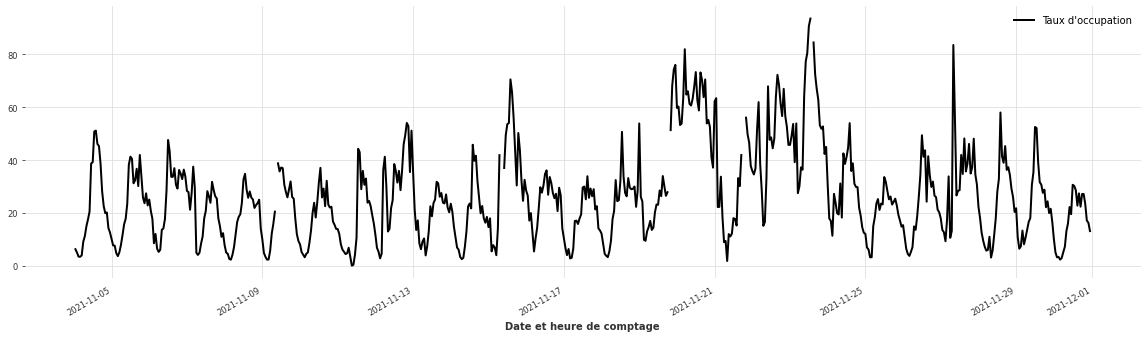

In [76]:
plt.rcParams['figure.figsize'] = [20, 5]
# plot component of index 1 after 2021-11-04 
ts.drop_before(pd.Timestamp("2021-11-04")).univariate_component(1).plot(label='Taux d\'occupation')

## Data Exploration 

### Correlation entre les variables (Debit Horaire et Taux d'occupation)

<AxesSubplot:>

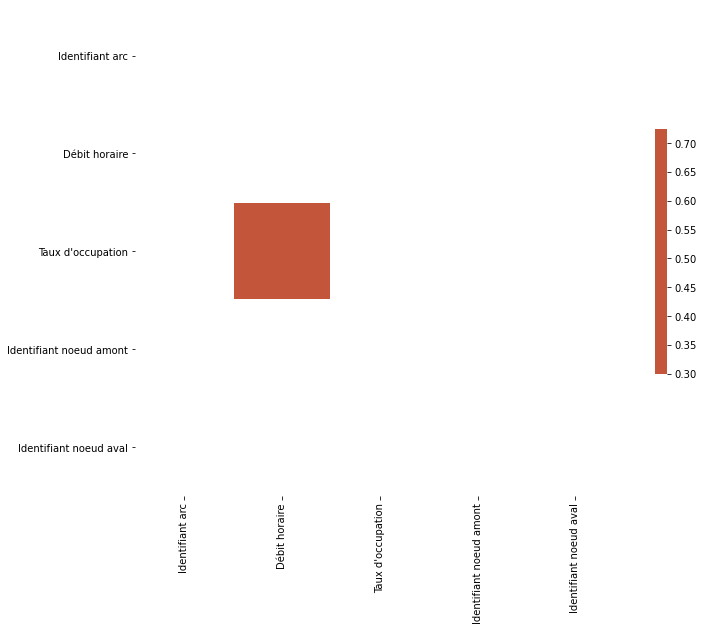

In [21]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:xlabel='Débit horaire', ylabel="Taux d'occupation">

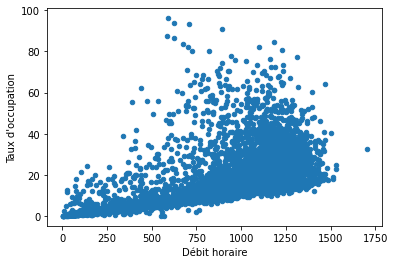

In [22]:
df.plot.scatter(x='Débit horaire',y="Taux d'occupation")

In [24]:
df.corr(method='pearson')

,Identifiant arc,Débit horaire,Taux d'occupation,Identifiant noeud amont,Identifiant noeud aval
Identifiant arc,NaN,NaN,NaN,NaN,NaN
Débit horaire,NaN,1.000000,0.724525,NaN,NaN
Taux d'occupation,NaN,0.724525,1.000000,NaN,NaN
Identifiant noeud amont,NaN,NaN,NaN,NaN,NaN
Identifiant noeud aval,NaN,NaN,NaN,NaN,NaN


Pas de corrélation significative entre les 2 variables => les 2 variables sont linéairement décorrélées

### Stationnarité des séries temporelles

/Users/anouaroussalah/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


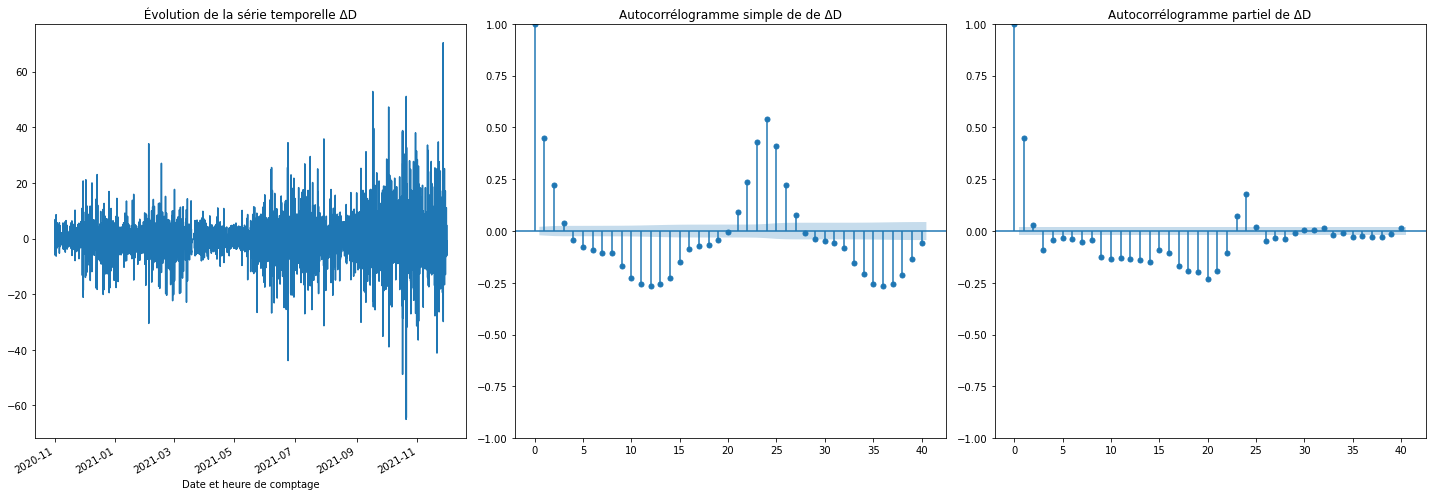

In [32]:
delta_D = df["Débit horaire"].diff().dropna()


fig = plt.figure(figsize = (20,7))
layout = (1,3)
ax1 = plt.subplot2grid(layout, (0,0))
ax2 = plt.subplot2grid(layout ,(0,1))
ax3 = plt.subplot2grid(layout ,(0,2))
delta_X.plot(ax=ax1)
smt.graphics.plot_acf(delta_D, ax=ax2)
smt.graphics.plot_pacf(delta_D, ax=ax3)
ax1.set_title(' Évolution de la série temporelle ΔD ')
ax2.set_title('Autocorrélogramme simple de de ΔD')
ax3.set_title('Autocorrélogramme partiel de ΔD')


plt.tight_layout()

/Users/anouaroussalah/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


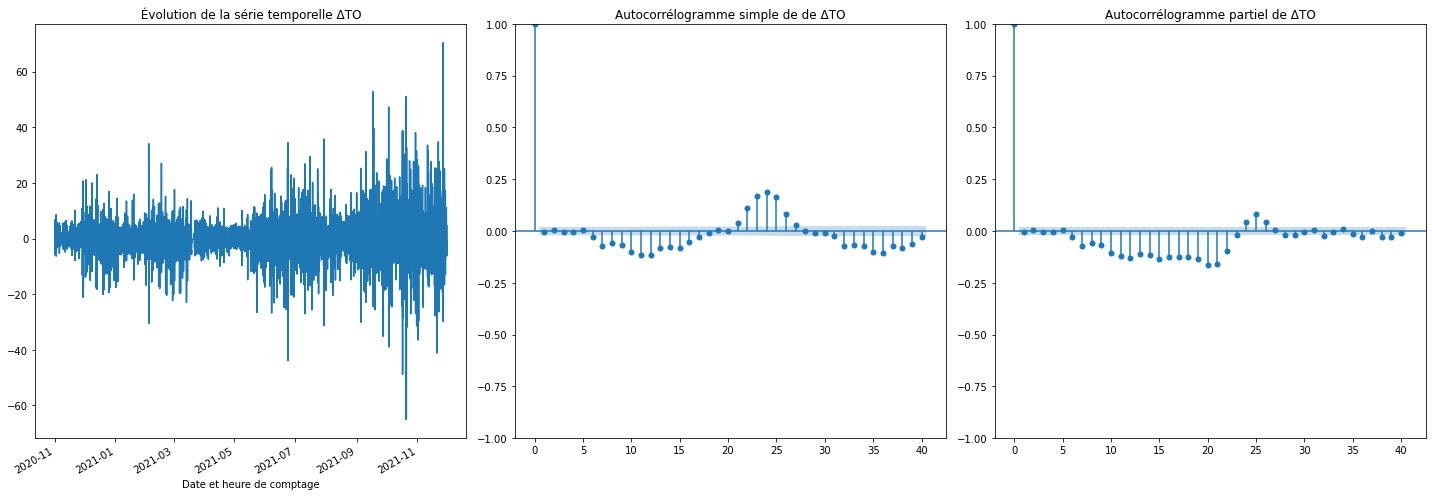

In [33]:
delta_TO = df["Taux d'occupation"].diff().dropna()


fig = plt.figure(figsize = (20,7))
layout = (1,3)
ax1 = plt.subplot2grid(layout, (0,0))
ax2 = plt.subplot2grid(layout ,(0,1))
ax3 = plt.subplot2grid(layout ,(0,2))
delta_X.plot(ax=ax1)
smt.graphics.plot_acf(delta_TO, ax=ax2)
smt.graphics.plot_pacf(delta_TO, ax=ax3)
ax1.set_title(' Évolution de la série temporelle ΔTO ')
ax2.set_title('Autocorrélogramme simple de de ΔTO')
ax3.set_title('Autocorrélogramme partiel de ΔTO')


plt.tight_layout()

### Test de Dicky Fuller de stationnarité

In [35]:
from statsmodels.tsa.stattools import adfuller
print('Pour le débit horaire, on a :')
adfuller(delta_D)

Pour le débit horaire, on a :


(-23.7962038787836,
 0.0,
 38,
 9139,
 {'1%': -3.4310657388876984,
  '5%': -2.86185631073078,
  '10%': -2.566938367147833},
 113036.88882584703)

In [37]:
from statsmodels.tsa.stattools import adfuller
print("Pour le taux d'occupation, on a :")
adfuller(delta_TO)

Pour le taux d'occupation, on a :


(-22.578299219463887,
 0.0,
 38,
 9139,
 {'1%': -3.4310657388876984,
  '5%': -2.86185631073078,
  '10%': -2.566938367147833},
 56137.915702221646)

L'hypothse $H_{0}$ testée est la suivante :"La série n'est pas stationnaire".
Les p-valeurs étant négatives, c'est bizzare


### Saisonnalité des séries temporelles

In [8]:
df = df.dropna()

In [25]:
result=seasonal_decompose(df['Débit horaire'], model='Additive', period = 1)

<AxesSubplot:xlabel='Date et heure de comptage'>

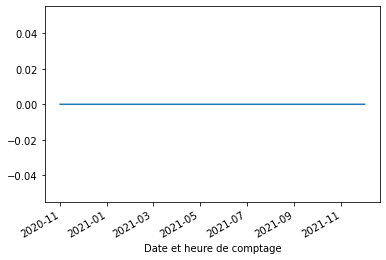

In [38]:
result.seasonal.plot()

<AxesSubplot:xlabel='Date et heure de comptage'>

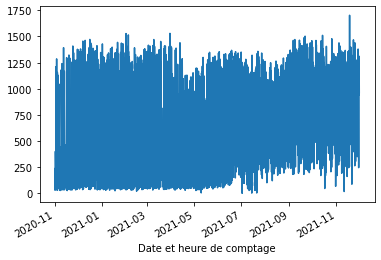

In [39]:
result.trend.plot()